In [1]:
### import xarray as xr
import numpy as np
import matplotlib
import mars_currents as mc
from mc.swia_files import load_swia_data as lsd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# %matplotlib widget
import spiceypy as spice
from spiceypy.utils.support_types import SpiceyError
from mc.spice_codes.load_spice_kernels import load_spice_kernels
import pandas as pd
spice.furnsh('pck00010.tpc')
from mc import load_mag_data_rotate_to_mse as data_mse
from scipy.ndimage import median_filter
import scipy
import matplotlib.patches as mpatches 

In [8]:
import numpy as np
np.deg2rad(135)

2.356194490192345

In [6]:
np.deg2rad(-135)


-2.705260340591211

In [2]:
load_spice_kernels('../maven_spice/maven_time_frames.tm')

In [3]:
# sw_data = pd.read_csv('drivers_merge_l2_hires.txt', sep='\s+', names=['UT', 'n_proton', 'n_alpha', '|v_proton|', 'vx', 'vy', 'vz', 'T_proton (eV)', 'Bx', 'By', 'Bz'])
# sw_data['et'] = [spice.utc2et(utc) for utc in sw_data['UT'].values]


In [4]:
sw_data = pd.read_csv('drivers_merge_l2_hires_new.csv', usecols = [i for i in range(1,13)])

In [5]:
m_p = 1.67262192e-27 #kg
m_a = 6.6446573357e-27 #kg
m_e = 9.10938e-31
mu0 = 1.25663706212e-6

kb = 1.380649e-23


In [6]:
# sw_data['v_A'] = 1e-9*np.sqrt(sw_data['Bx']**2 + sw_data['By']**2 + sw_data['Bz']**2)/np.sqrt(mu0* 1e6*(sw_data['n_proton']*m_p + sw_data['n_alpha']*m_a))* 1e-3


In [7]:
m_p = 1.67262192e-27 #kg
m_a = 6.6446573357e-27 #kg
m_e = 9.10938e-31
mu0 = 1.25663706212e-6

kb = 1.380649e-23

sw_data['p_dyn'] = (sw_data['n_proton']*m_p + sw_data['n_alpha']*m_a)*(1e5*sw_data['|v_proton|'])**2 * 1e11
# sw_data['c_s'] = (5/3 * sw_data['T_proton (eV)']*1.60218e-19/m_p)**(1/2)*1e-3
# sw_data['M'] = sw_data['|v_proton|']/sw_data['c_s']
# sw_data['M_ms'] = sw_data['|v_proton|'] / np.sqrt(sw_data['v_A']**2 + sw_data['c_s']**2)

In [8]:
# sw_data.hist(bins=600, figsize = (14,14))

In [9]:
start = "2014-10-11T00:00:00.000"
end = "2020-08-14T00:00:00.000"
df = pd.read_csv('mag_mse_2014-10-11_2020-08-14_n15_all.csv', index_col = 0)
df = df.drop(
    columns=[
        "Bx",
        "By",
        "Bz",
        "Bx_aber",
        "By_aber",
        "Bz_aber",
        "X",
        "Y",
        "Z",
        "R",
        "X_aber",
        "Y_aber",
        "Z_aber",
        "clock_angle",
       # "R_aber",
        "r_sp_cyl",
        "th_sp_cyl",
        "r_bs",
        "loc",
        
    ],
    axis=1,
)

In [10]:
df_orbits = pd.read_csv('../maven_orbits.txt', sep=", ", header=2, engine='python')
df_orbits = df_orbits[(df_orbits['START_ET'] >= df.loc[df.index[0], 'time']) & (df.loc[df.index[-1], 'time'] >= df_orbits['START_ET'])]
df_orbits = df_orbits.drop(columns = ['ORBIT_NUMBER', 'START_ET', 'FINISH_ET', 'START_UTC', 'FINISH_UTC', 'PERIAPSIS_UTC'], axis = 1)

In [32]:
# freq_sampl = 20
# bow_shock_pars = {'x0':0.74, 'L':1.82, 'eps':1.01}
# smooth_factor = 15

# data_dict = dict(frame = "ss", sampl = "1s", start = start, end = end, 
#                  freq_sampl = freq_sampl, folder_path = '../mag/l2', kernel_path = '../maven_spice/maven_time_frames.tm', 
#                  orbits_file_path = '../maven_orbits.txt')

In [33]:
# df, _ = data_mse.load_data(data_dict, aberation = 4)

# df = pd.read_csv('yoo', index_col = 0)

In [14]:
sw_data = sw_data[(sw_data.et >=  df.loc[df.index[0], 'time']) & (sw_data.et <= df.loc[df.index[-1], 'time'])]

In [35]:
# df['p_dyn'] = np.nan
# df['M'] = np.nan

In [24]:
# df = data_mse.rotated_to_mse(data_dict = data_dict, aberation = 4, smooth_factor = smooth_factor, 
#                    bow_shock_pars = bow_shock_pars, 
#                    save = [True, '_with_sw_rotated'], out = True, df = df, df_orbits = df_orbits) 


Saved file: mag_mse_2014-10-11_2020-08-13_n20_with_sw_rotated.csv, of all data.

Saved file: mag_mse_2014-10-11_2020-08-13_ms_n20_with_sw_rotated.csv, of data inside the bow shock.


In [15]:
qr1 = np.nanpercentile(sw_data.p_dyn,25, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 25), scale = 'normal')
qr3 = np.nanpercentile(sw_data.p_dyn,75, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 75), scale = 'normal')
qr2 = np.nanpercentile(sw_data.p_dyn,50, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 50), scale = 'normal')
iqr = qr3-qr1#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(25, 75), scale = 'normal')

calm = (sw_data.p_dyn>=qr1) & (sw_data.p_dyn<=qr3)
weak = (sw_data.p_dyn<qr1) 
strong = (sw_data.p_dyn>qr3)

mean_p_dyn = np.nanmean(sw_data.p_dyn)
median_p_dyn = np.nanmedian(sw_data.p_dyn)
std_p_dyn = np.nanstd(sw_data.p_dyn)
skew = (mean_p_dyn - median_p_dyn) / std_p_dyn


/tmp/ipykernel_12066/2967406530.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


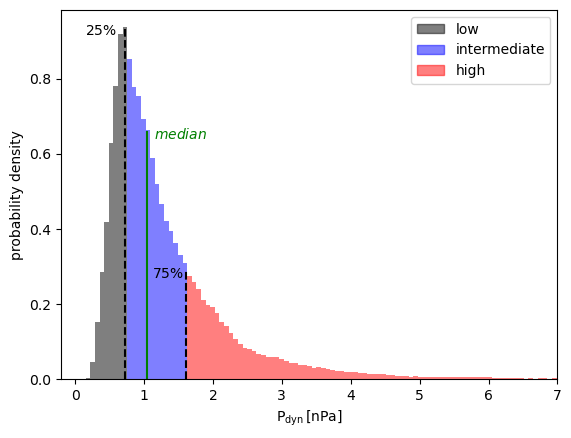

In [24]:
fig, ax = plt.subplots()
ax.axvline(median_p_dyn, color= 'g', label = 'median', ymax = 0.67)

ax.axvline(qr3, color= 'black', linestyle = '--', label = r'$75 \%$', ymax = 0.3)
ax.axvline(qr1, color = 'black', linestyle = '--', label = r'$25 \%$', ymax = 0.955)
ax.text(x=qr1*0.2,y=0.915, s=r'$25 \%$', color='black')
ax.text(x=qr3*0.7,y=0.27, s=r'$75 \%$', color='black')
ax.text(x = median_p_dyn*1.1, y = 0.64, s = r'$median$', color = 'g')

N, bins, patches = ax.hist(sw_data.p_dyn, density = True, linewidth=1, bins = 500)

for i, patch in enumerate(patches):
           
        if bins[i] < qr1:
            patch.set_facecolor('k')
        elif bins[i]>=qr1 and bins[i]<=qr3:
            patch.set_facecolor('b')
        else:
            patch.set_facecolor('r')
        patch.set_alpha(0.5)

pop_weak = mpatches.Patch(color='k', alpha = 0.5, label='low') 
pop_calm = mpatches.Patch(color='b', alpha = 0.5, label='intermediate') 
pop_strong = mpatches.Patch(color='r', alpha = 0.5, label='high') 

ax.legend(handles=[pop_weak,pop_calm,pop_strong]) 
ax.set_xlim([-0.2, 7])
ax.set_ylabel('probability density')
ax.set_xlabel(r'$\rm {P_{dyn} \, [nPa]}$')
ax.grid(visible = False)
fig.savefig(f'../pres/{spice.timout(df.time[df.index[0]], pictur = "YYYY-MM-DD")}_{spice.timout(df.time[df.index[-1]], pictur = "YYYY-MM-DD")}_p_dyn_histogram.png', dpi = 500)
fig.show()

In [47]:
calm_name = 'mag_mse_'+spice.timout(df[0].time[df[0].index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df[0].time[df[0].index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_calm_sw'+'.csv'
df[0].loc[(df[0].p_dyn>=qr1) & (df[0].p_dyn<=qr3)].to_csv(calm_name)

In [61]:
weak_name = 'mag_mse_'+spice.timout(df[0].time[df[0].index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df[0].time[df[0].index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_weak_sw'+'.csv'
df[0].loc[df[0].p_dyn<qr1].to_csv(weak_name)

In [62]:
strong_name = 'mag_mse_'+spice.timout(df[0].time[df[0].index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df[0].time[df[0].index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_strong_sw'+'.csv'
df[0].loc[df[0].p_dyn>qr3].to_csv(strong_name)

In [20]:
first_sw_point = 0
smooth_factor = 7
mag_index = (df['time'] > sw_data.loc[0, 'et']).idxmax()
for irow in range(len(sw_data)-1):
    print( '\r', f' {sw_data.UT[irow][:]}', end =" ")
    orbit_id0 = (df_orbits['PERIAPSIS_ET'] < sw_data.loc[sw_data.index[irow], 'et']).idxmin() - 1
    
    orbit_id1 = (df_orbits['PERIAPSIS_ET'] < sw_data.loc[sw_data.index[irow+1], 'et']).idxmin() - 1

    if irow != len(sw_data) - 1 and orbit_id0 == orbit_id1 and mag_index + 810 <= len(df):

        cond = (sw_data.et[sw_data.index[irow]] < df.time[mag_index:mag_index+810]) & (sw_data.et[sw_data.index[irow+1]] > df.time[mag_index:mag_index+810])

        df.loc[cond[cond==True].index, ['p_dyn']] = (sw_data.p_dyn[irow] + sw_data.p_dyn[irow+1])/2#, (sw_data.M[irow]+sw_data.M[irow+1])/2

        if not cond[cond == True].index.empty:
            
            mag_index = cond[cond == True].index[-1]
            
        else:
            
            mag_index = (df['time'] > sw_data.loc[irow+1, 'et']).idxmax()
        
    elif irow != len(sw_data) - 1 and (orbit_id1 == orbit_id0 + 1) and mag_index + 810 <= len(df):
                
        cond = (sw_data.et[sw_data.index[irow]] < df.time[mag_index:mag_index+810]) & (sw_data.et[sw_data.index[irow+1]] > df.time[mag_index:mag_index+810])
        
        p_dyn_orbit = np.median(median_filter(sw_data.loc[first_sw_point:irow, 'p_dyn'], smooth_factor))
        # M_orbit = np.median(median_filter(sw_data.loc[first_sw_point:irow, 'M'], smooth_factor))
        
        df.loc[cond[cond==True].index, ['p_dyn', 'M']] = p_dyn_orbit#, M_orbit
        
        first_sw_point = irow + 1
        
        if not cond[cond == True].index.empty:
            
            mag_index = cond[cond == True].index[-1]
            
        else:
            
            mag_index = (df['time'] > sw_data.loc[irow+1, 'et']).idxmax()

        
    elif orbit_id1 < orbit_id0:
        
        print('WTFMATE')
        
    elif irow == len(sw_data) - 1:
        
        break

  2020-08-14/13:33:59 

In [21]:
qr1 = np.nanpercentile(sw_data.p_dyn,25, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 25), scale = 'normal')
qr3 = np.nanpercentile(sw_data.p_dyn,75, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 75), scale = 'normal')
qr2 = np.nanpercentile(sw_data.p_dyn,50, axis=0, method = 'median_unbiased')#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(0, 50), scale = 'normal')
iqr = qr3-qr1#scipy.stats.iqr(sw_data.p_dyn, nan_policy = 'omit', interpolation = 'nearest', rng=(25, 75), scale = 'normal')

calm = (sw_data.p_dyn>=qr1) & (sw_data.p_dyn<=qr3)
weak = (sw_data.p_dyn<qr1) 
strong = (sw_data.p_dyn>qr3)

mean_p_dyn = np.nanmean(sw_data.p_dyn)
median_p_dyn = np.nanmedian(sw_data.p_dyn)
std_p_dyn = np.nanstd(sw_data.p_dyn)
skew = (mean_p_dyn - median_p_dyn) / std_p_dyn


/tmp/ipykernel_12066/805041130.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


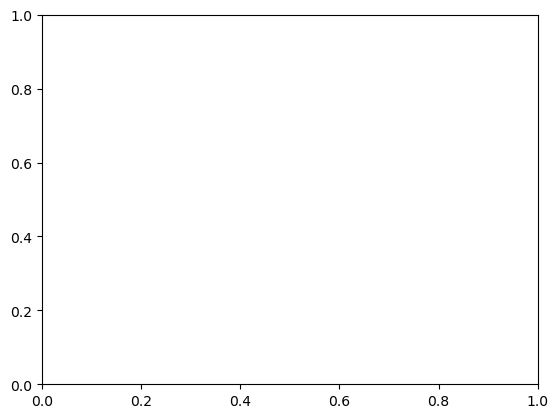

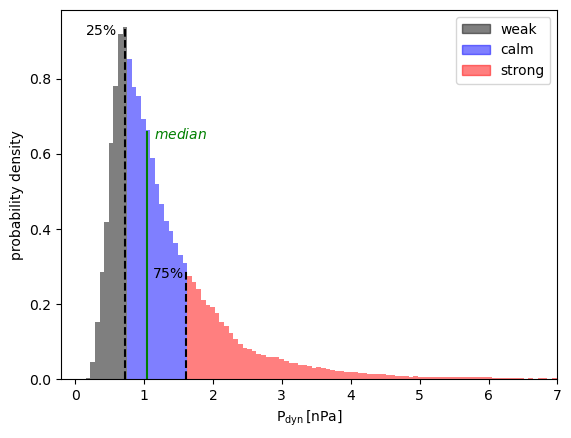

In [23]:
plt.cla()
fig, ax = plt.subplots()
ax.axvline(median_p_dyn, color= 'g', label = 'median', ymax = 0.67)

ax.axvline(qr3, color= 'black', linestyle = '--', label = r'$75 \%$', ymax = 0.3)
ax.axvline(qr1, color = 'black', linestyle = '--', label = r'$25 \%$', ymax = 0.955)
ax.text(x=qr1*0.2,y=0.915, s=r'$25 \%$', color='black')
ax.text(x=qr3*0.7,y=0.27, s=r'$75 \%$', color='black')
ax.text(x = median_p_dyn*1.1, y = 0.64, s = r'$median$', color = 'g')

N, bins, patches = ax.hist(sw_data.p_dyn, density = True, linewidth=1, bins = 500)

for i, patch in enumerate(patches):
           
        if bins[i] < qr1:
            patch.set_facecolor('k')
        elif bins[i]>=qr1 and bins[i]<=qr3:
            patch.set_facecolor('b')
        else:
            patch.set_facecolor('r')
        patch.set_alpha(0.5)

pop_weak = mpatches.Patch(color='k', alpha = 0.5, label='weak') 
pop_calm = mpatches.Patch(color='b', alpha = 0.5, label='calm') 
pop_strong = mpatches.Patch(color='r', alpha = 0.5, label='strong') 

ax.legend(handles=[pop_weak,pop_calm,pop_strong]) 
ax.set_xlim([-0.2, 7])
ax.set_ylabel('probability density')
ax.set_xlabel(r'$\rm {P_{dyn} \, [nPa]}$')
ax.grid(visible = False)
fig.savefig(f'{spice.timout(df.time[df.index[0]], pictur = "YYYY-MM-DD")}_{spice.timout(df.time[df.index[-1]], pictur = "YYYY-MM-DD")}_p_dyn_histogram.png', dpi = 500)
fig.show()

In [25]:
freq_sampl = 15

In [26]:
df.to_csv('mag_mse_'+spice.timout(df.time[df.index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df.time[df.index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_with_sw_data'+'.csv')

In [27]:
calm_name = 'mag_mse_'+spice.timout(df.time[df.index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df.time[df.index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_calm_sw'+'.csv'
df.loc[(df.p_dyn>=qr1) & (df.p_dyn<=qr3)].to_csv(calm_name)

In [28]:
weak_name = 'mag_mse_'+spice.timout(df.time[df.index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df.time[df.index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_weak_sw'+'.csv'
df.loc[df.p_dyn<qr1].to_csv(weak_name)

In [29]:
strong_name = 'mag_mse_'+spice.timout(df.time[df.index[0]], pictur = 'YYYY-MM-DD')+'_'+spice.timout(df.time[df.index[-1]], pictur = 'YYYY-MM-DD')+'_n'+str(freq_sampl)+'_strong_sw'+'.csv'
df.loc[df.p_dyn>qr3].to_csv(strong_name)

In [11]:
import xarray as xr
import numpy as np
import matplotlib
from mc.swia_files import load_swia_data as lsd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# %matplotlib widget
import spiceypy as spice
from spiceypy.utils.support_types import SpiceyError
from mc.spice_codes.load_spice_kernels import load_spice_kernels
import pandas as pd
spice.furnsh('pck00010.tpc')
from mc import load_mag_data_rotate_to_mse as data_mse
from scipy.ndimage import median_filter
import scipy
import matplotlib.patches as mpatches 
import matplotlib.dates as mdate
import matplotlib.colors as colors
from mc import load_mag_data_rotate_to_mse as data_mse

In [12]:
start="2015-01-01T18:00:00.000"
end="2015-01-02T02:16:00.000"
kind = 'onboardsvyspec'
data_path = '../swi/l2'

kernel_path = '../maven_spice/maven_time_frames.tm'

resampling = None #dict(res_freq = '1min', mode = 'median')
swia_dataset = lsd.load_data(start, end, kind, data_path, kernel_path, resampling = resampling, thin_n = 15, )
swia_dataset

These files do not exist: 

--------------------------------------------------------------------
Loading files: 

 ../swi/l2/2015/01/mvn_swi_l2_onboardsvyspec_20150102_v02_r00.cdf 

<xarray.Dataset> Size: 1MB
Dimensions:                 (epoch: 2880, energy_spectra: 48)
Coordinates:
  * energy_spectra          (energy_spectra) float32 192B 2.324e+04 ... 25.94
  * epoch                   (epoch) float64 23kB 4.733e+08 ... 4.735e+08
Data variables:
    time_met                (epoch) float64 23kB 4.733e+08 ... 4.735e+08
    time_unix               (epoch) float64 23kB 1.42e+09 1.42e+09 ... 1.42e+09
    atten_state             (epoch) uint8 3kB 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1
    num_accum               (epoch) int16 6kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    decom_flag              (epoch) float32 12kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    spectra_counts          (epoch, energy_spectra) float32 553kB 0.0 ... 7.0
    spectra_diff_en_fluxes  (epoch, energy_spectra) float32 553kB 0.0 ... 2.4...
    geom_factor             (epoch) float32 12kB 0.00392 0.00392 ... 0.00392
    de_over_e_spectra       (epoch) float32 12kB 0.15 0.15 0.15 ... 0.15 0.15
    accum_time_spectra      (epoch) float32 12kB 1.306 1.306 ... 1.306 1.306
    num_spec                (epoch) int16 6kB 21600 21600 21600 ... 21600 21600
Attributes: (12/24)
    TITLE:                       ['MAVEN SWIA Onboard Energy Spectra']
    Project:                     ['MAVEN>Mars Atmosphere and Volatile Evoluti...
    Discipline:                  ['Planetary Physics>Particles']
    Source_name:                 ['MAVEN>Mars Atmosphere and Volatile Evoluti...
    Descriptor:                  ['SWIA>Solar Wind Ion Analyzer']
    Data_type:                   ['CAL>Calibrated']
    ...                          ...
    PDS_start_time:              ['2015-01-01T00:00:04.836Z']
    PDS_stop_time:               ['2015-01-02T00:00:00.537Z']
    PDS_sclk_start_count:        [31020966359569.0]
    PDS_sclk_stop_count:         [31026628384996.77]
    leapseconds_kernel:          ['naif0012.tls']
    Spacecraft_clock_kernel:     ['MVN_SCLKSCET.00096.tsc']

In [13]:
freq_sampl = 20

bow_shock_pars = {'x0':0.74, 'L':1.82, 'eps':1.01}
smooth_factor = 15

data_dict = dict(frame = "ss", sampl = "1s", start = start, end = end, 
                 freq_sampl = freq_sampl, folder_path = '../mag/l2', kernel_path = '../maven_spice/maven_time_frames.tm', 
                 orbits_file_path = '../maven_orbits.txt', spice_pck = 'pck00010.tpc')

df_mag, _ = data_mse.load_data(data_dict, aberation = None)
df_mag

These files do not exist: 

--------------------------------------------------------------------
Loading files: 

 ../mag/l2/2015/01/mvn_mag_l2_2015002ss1s_20150102_v01_r01.sts 

,time,Bx,By,Bz,X,Y,Z
3240,4.734073e+08,-1.85,6.81,-0.38,1.670566,-1.137329,0.005085
3241,4.734073e+08,-3.03,4.82,0.11,1.680134,-1.135289,-0.005557
3242,4.734073e+08,-2.56,5.34,-1.18,1.689614,-1.133190,-0.016199
3243,4.734073e+08,-3.67,4.08,0.42,1.699005,-1.131031,-0.026840
3244,4.734073e+08,-3.43,4.90,1.70,1.708310,-1.128815,-0.037479
...,...,...,...,...,...,...,...
4723,4.734369e+08,-7.01,-4.70,-6.08,-0.871631,0.132741,0.578453
4724,4.734369e+08,-8.22,-6.02,-6.06,-0.862022,0.114862,0.592393
4725,4.734370e+08,-7.52,-11.68,-7.65,-0.852091,0.096941,0.606111
4726,4.734370e+08,-7.08,-3.02,-8.40,-0.841840,0.078984,0.619600


In [14]:
meta_k = 'maven_2015_v11_150102_150102.tm'
spice.furnsh(meta_k)


In [15]:
start_et = spice.str2et(start)
end_et = spice.str2et(end)

# Time step for trajectory points
step_size = 20  # seconds

# Generate time array
times = np.arange(start_et, end_et, step_size)

# Initialize arrays to store spacecraft positions
positions = np.zeros((len(times), 3))
alt = np.zeros(len(times)); lat = np.zeros(len(times)); long = np.zeros(len(times))
# vx = np.zeros(len(times)); vy = np.zeros(len(times)); vz = np.zeros(len(times))
# vel = np.zeros(len(times))
re = spice.bodvcd(499, 'RADII', 3)[1][0]  # Mars equatorial radius
rp = spice.bodvcd(499, 'RADII', 3)[1][2]  # Mars polar radius
f = (re-rp) / re # flattening coefficient

# Compute spacecraft positions at each time
for i, et in enumerate(times):
    state, _ = spice.spkgeo(-202, et, 'MAVEN_MSO', 499)

    long[i], lat[i], alt[i] = spice.recpgr('MARS', state[:3], re, f)
    # vx[i], vy[i], vz[i] = state[3:]
    #sd=spiceypy.pxform('IAU_MARS','MAVEN_MSO',et)
    positions[i] = state[:3]
mars_radius = spice.bodvcd(499, 'RADII', 3)[1][0]  # Mars equatorial radius
positions = positions / mars_radius

In [22]:
dt = 60*60
et_lim = [spice.utc2et('2015-01-02T01:15:00'), spice.utc2et('2015-01-02T02:15:00')]
et_ticks = np.arange(et_lim[0], et_lim[1], dt)
lat = np.rad2deg(long)
bow_shock_pars = {'x0':0.74, 'L':1.82, 'eps':1.01}
x_new = positions[:,0] - bow_shock_pars['x0']
# positions[i] = 
th_sp_cyl = np.arctan2(np.sqrt(positions[:,1]**2+positions[:,2]**2),positions[:,0])
r_bs = mc.generic.bow_shock.bow_shock(bow_shock_pars['x0'], bow_shock_pars['L'], bow_shock_pars['eps'], th_sp_cyl)

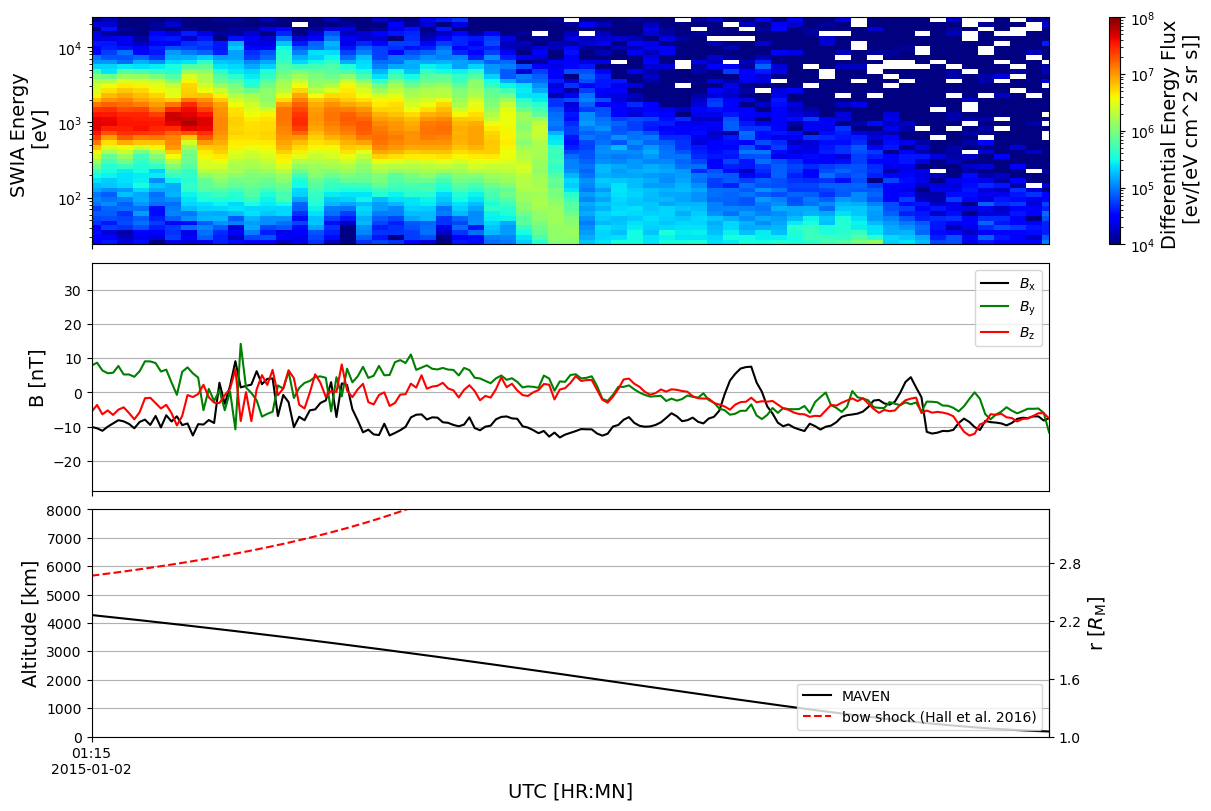

In [23]:
et_tick_lim = [et_lim[0], et_lim[1]]
# et_ticks = np.linspace(et_lim[0], et_lim[1], 8)
et_ticks = np.arange(et_tick_lim[0], et_tick_lim[1], dt+4*1)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,8),sharex=True, layout='constrained')

et_ticks_labels=[]
et_ticks_labels.append(spice.timout(et_ticks[0], pictur = 'HR:MN') + '\n'+spice.timout(et_ticks[0], pictur = 'YYYY-MM-DD'))
et_ticks_labels+=[spice.timout(et_ticks[i], pictur = 'HR:MN') for i in range(1, len(et_ticks))]

cmap = swia_dataset['spectra_diff_en_fluxes'].T.plot.pcolormesh(yscale='log', cmap='jet', norm = colors.LogNorm(), vmin=1e4,ax=ax[0],vmax=1e8, add_colorbar=False,)
cb = plt.colorbar(cmap, orientation = 'vertical', pad = 0.00000)
cb.set_label(label = f"Differential Energy Flux \n [{swia_dataset.spectra_diff_en_fluxes.attrs['UNITS']}]", fontsize = 14)
ax[2].plot(times, alt, 'black', label = 'MAVEN')
ax[2].plot(times, r_bs*mars_radius, 'red', linestyle = '--', label = 'bow shock (Hall et al. 2016)')
ax[1].plot(df_mag.time, df_mag.Bx, 'black', label = r'$B_{\rm x}$')
ax[1].plot(df_mag.time, df_mag.By, 'green', label = r'$B_{\rm y}$')
ax[1].plot(df_mag.time, df_mag.Bz, 'red', label = r'$B_{\rm z}$')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('B [nT]', fontsize = 14)
def altitude(alt):
    
    return alt

def altitude_norm(alt):
    
    return alt/mars_radius + 1

ax[0].set_ylabel('SWIA Energy \n [eV]', fontsize = 14)
ax[0].set_xticks(ticks = et_ticks, labels = '');
ax[2].set_xticks(ticks = et_ticks, labels = et_ticks_labels);
ax[0].set_xlabel('')
ax[2].set_xlabel(f'UTC [HR:MN]', fontsize = 14);
ax[2].set_ylabel('Altitude [km]', fontsize = 14)
ax[0].set_xlim(et_lim)
ax[2].set_xlim(et_lim)
ax[2].set_ylim([0, 8000])
ax[2].legend(loc='lower right')
ax[2].grid()
secax = ax[2].secondary_yaxis('right', functions=(altitude_norm, altitude))
secax.set_ylabel(r'r $[R_{\rm M}]$', fontsize = 14);
secax.set_yticks(ticks = np.around(altitude_norm(ax[2].get_yticks()), decimals = 1));
# fig.savefig('SWIA_altitude.png', dpi = 800)

In [411]:
len(et_ticks_labels)/len(et_ticks)

1.0

In [291]:
import mc.generic.bow_shock

In [431]:
ax[1].get_cbar

AttributeError: 'Axes' object has no attribute 'get_cbar'